In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.filters as flt
import matplotlib as mpl
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import scipy.stats as stats
import skimage.io as io
import astropy.io.fits as fits
%matplotlib inline


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'png')
plt.style.use('default')
mpl.rcParams['figure.dpi'] = 150

# Class unbalance

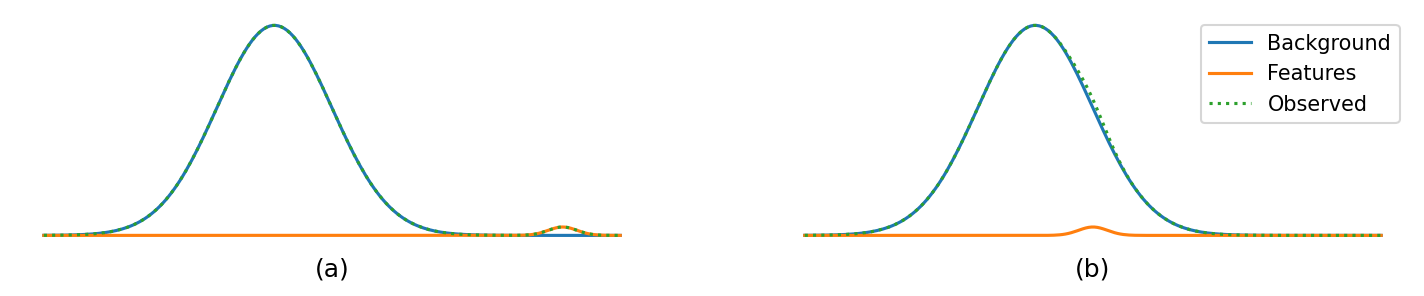

In [2]:
fig,ax = plt.subplots(1,2,figsize=(12,2))
x=np.linspace(0,20,200)
ax[0].plot(x,stats.norm.pdf(x, 8, 2),label='Background'); 
ax[0].plot(x,0.01*stats.norm.pdf(x, 18, 0.5),label='Feature'); 
ax[0].plot(x,stats.norm.pdf(x, 8, 2) + 0.01*stats.norm.pdf(x, 18, 0.5),':', label='Observed' ); 
ax[0].text(0.5, -0.1, '(a)', transform=ax[0].transAxes, fontsize=12, ha='center',va='center')  
ax[0].axis('off')
ax[1].plot(x,stats.norm.pdf(x, 8, 2),label='Background'); 
ax[1].plot(x,0.01*stats.norm.pdf(x, 10, 0.5),label='Features'); 
ax[1].plot(x,stats.norm.pdf(x, 8, 2) + 0.01*stats.norm.pdf(x, 10, 0.5),':', label='Observed' ); 
ax[1].axis('off')
ax[1].text(0.5, -0.1, '(b)', transform=ax[1].transAxes, fontsize=12, ha='center',va='center')  
ax[1].legend() ;
plt.savefig('../lecture/figures/classunbalance.svg')
plt.savefig('../lecture/figures/classunbalance.pdf')

In [3]:
print(x.shape)
print(x.reshape((10,20)).shape)

(200,)
(10, 20)


# Spot images

In [81]:
img=io.imread('../data/spots/mixture12_00001.png')
orig= fits.getdata('../data/spots/mixture12_00001.fits')

In [8]:
img.shape

(2048, 2048, 4)

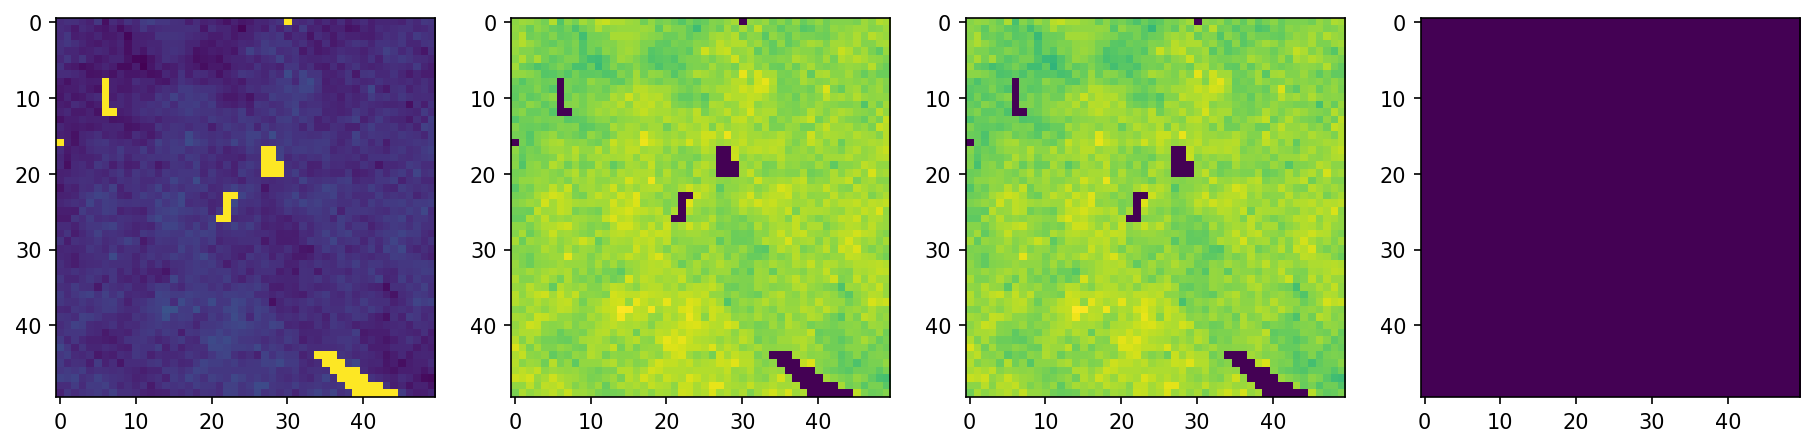

In [9]:
fig, ax = plt.subplots(1,4,figsize=(15,5))

for i in range(4) :
    #ax[i].imshow(img[0:50,0:50,i])
    ax[i].imshow(img[100:150,100:150,i])

In [11]:
img[:,:,0].max()

255

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

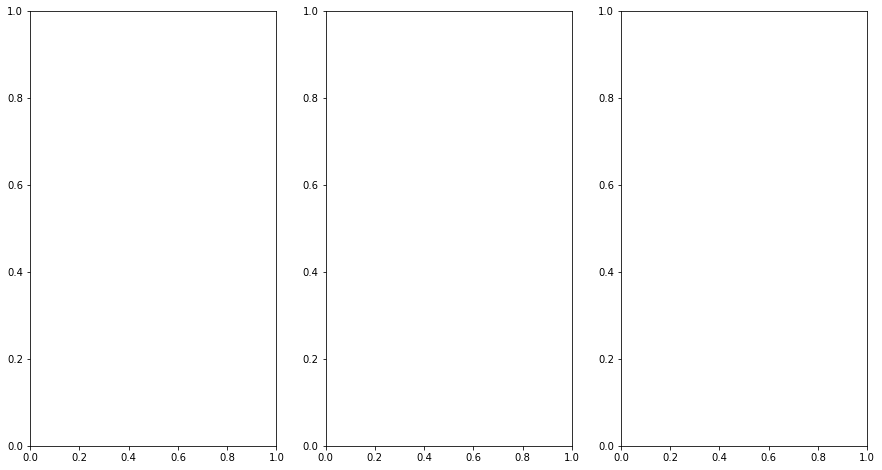

In [80]:
fig, ax = plt.subplots(1,3,figsize=(15,8))
r=600
c=600
w=256
mask=(img[:,:,1]==0).astype(float)
ax[0].imshow(orig[r:(r+w),c:(c+w)],vmin=0, vmax=4000,cmap='gray'), ax[0].set_title('Original projection')
ax[1].imshow(img[r:(r+w),c:(c+w)]), ax[1].set_title('Mark up')
ax[2].imshow(mask[r:(r+w),c:(c+w)],cmap='gray'),ax[2].set_title('Mask');
plt.savefig('../lecture/figures/markedspots.svg')
plt.savefig('../lecture/figures/markedspots.pdf')

In [82]:
img.shape

(2048, 2048, 4)

In [70]:
def magnifyRegion(img,roi, figsize, cmap='gray',vmin=0,vmax=0,title='Original') :
    if vmin==vmax:
        vmin=img.min()
        vmax=img.max()
    fig, ax = plt.subplots(1,2,figsize=figsize)
    
    ax[0].imshow(img,cmap=cmap,vmin=vmin, vmax=vmax)
    ax[0].plot([roi[1],roi[3]],[roi[0],roi[0]],'r')
    ax[0].plot([roi[3],roi[3]],[roi[0],roi[2]],'r')
    ax[0].plot([roi[1],roi[3]],[roi[2],roi[2]],'r')
    ax[0].plot([roi[1],roi[1]],[roi[0],roi[2]],'r')
    ax[0].set_title(title)
    subimg=img[roi[0]:roi[2],roi[1]:roi[3]]
    ax[1].imshow(subimg,cmap=cmap,extent=[roi[0],roi[2],roi[1],roi[3]],vmin=vmin, vmax=vmax)
    ax[1].set_title('Magnified ROI')
    
    

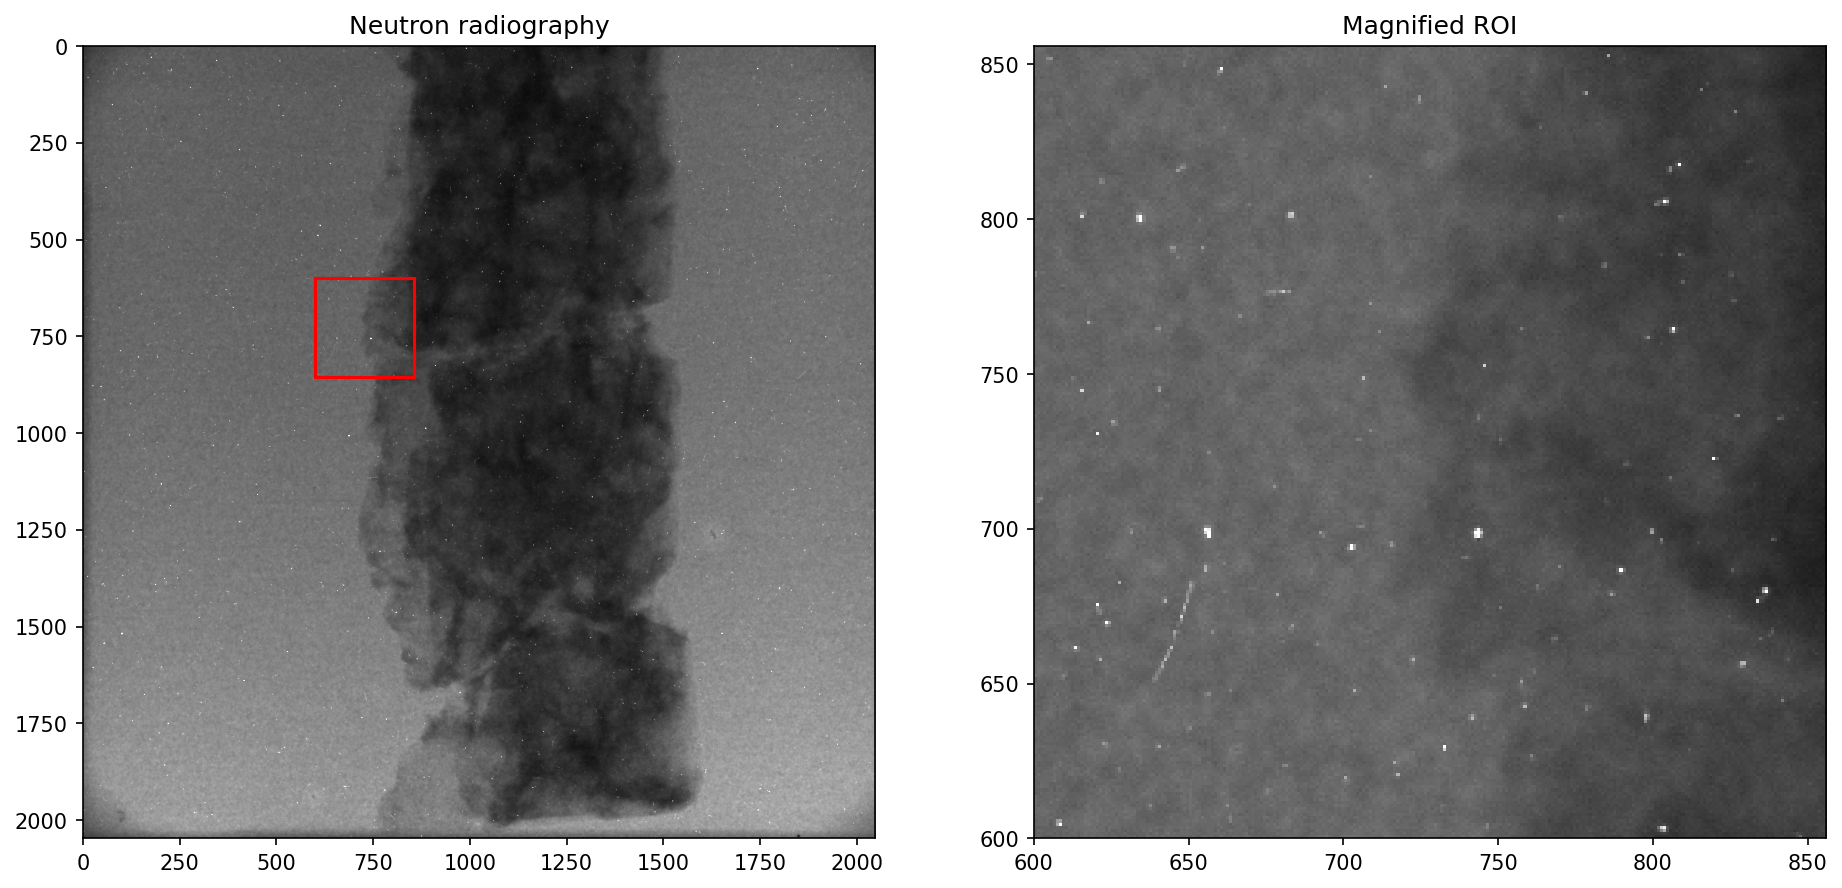

In [72]:
r=600
c=600
w=256
magnifyRegion(orig,[r,c,r+w,c+w],[15,7],vmin=400,vmax=4000,title='Neutron radiography')
plt.savefig('../lecture/figures/spotimage.svg')
plt.savefig('../lecture/figures/spotimage.pdf')

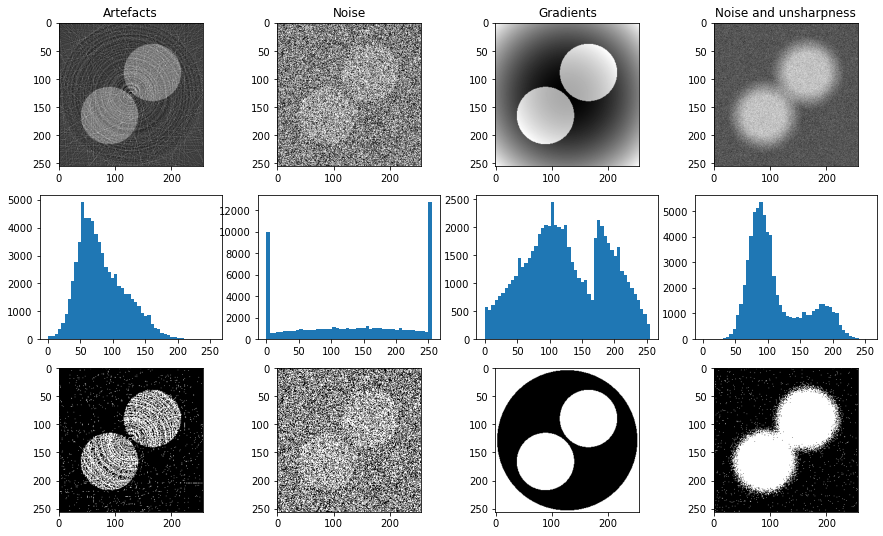

In [77]:
%matplotlib inline
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

files  = ['class_art_in.png','class_wgn_in.png','class_cupped_in.png','class_wgn_smooth_in.png']
titles = ['Artefacts','Noise','Gradients','Noise and unsharpness']

plt.figure(figsize=[15,9])
for i in range(4) :
    img = imread('../lecture/figures/'+files[i])
    plt.subplot(3,4,i+1), plt.imshow(img, cmap='gray'), plt.title(titles[i])
    plt.subplot(3,4,i+5), plt.hist(img.ravel(),bins=50)
    plt.subplot(3,4,i+9), plt.imshow(120<img, cmap='gray')
    
plt.savefig('../lecture/figures/trickycases.svg')
plt.savefig('../lecture/figures/trickycases.pdf')